In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import random
from plotUtils import *
from clusteringAlgos import *


## Motivations

First we generate time series data that starts in two clusters and then merges.

In [20]:
# generate series 
T = 40
N = 6

s1 = np.array([0,0,0,0,0,0,0,0,0,0,0.5,1,2,3,4,5.5,7.5,10,11,11.5])
s2 = np.array([13.5,13.5,13.5,14,13.5,13.5,13.5,13.5,13.5,13.5,13.5,13,13,13,13,12.5,12.5,12,12,12])
s3 = np.array([12]*20)

centers = [list(s2) + list(s3) ,list(s1) ]

trajs = []

for i in range(N):
    s = list(np.random.normal(0, 1, T))
    if i <4:
        s0 = s1
    else:
        s0 = s2
    s = np.concatenate((s0,s3),axis=0) + list(np.random.normal(0, 0.5, T))
    trajs.append(list(s))
    
sim_df = traj_list_to_df(trajs)
clusts_df = traj_list_to_df(centers)

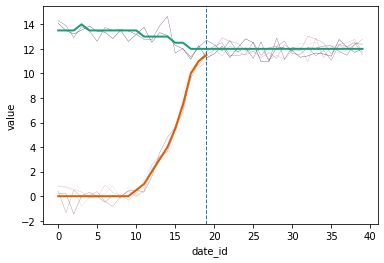

In [21]:
sns.lineplot(data=sim_df,
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.3)

sns.lineplot(data=clusts_df,
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 2)


plt.axvline(19, 0,20,
            linewidth=1,
            ls="--")


Then we generate time series data that starts in a single cluster and then splits into two clusters.

In [22]:
T = 40
N = 30

s1 = np.array([15]*20) + np.random.normal(0, 0.2, 20)
s2 = np.array([15,15.2,15.5,15.8,16,17,18,19,19.5,20,20.5,20.9,21,21.2,21.5,22,22.4,22.8,23,24] ) + np.random.normal(0, 0.2, 20)
s3 = np.array([15]*20) + np.random.normal(0, 0.2, 20)

centers = [list(s3) +list(s1)   , list(s2) ]

trajs = []

for i in range(N):
    s = list(np.random.normal(0, 1, T))
    if i <15:
        s0 = s1
    else:
        s0 = s2
    s = np.concatenate((s3,s0),axis=0) + list(np.random.normal(0, 0.3, T))
    trajs.append(list(s))
    
sim_df = traj_list_to_df(trajs)
clusts_df1 = traj_list_to_df([list(s3) +list(s1)] )
clusts_df2 = traj_list_to_df([list(s2)] ,start_time=20)


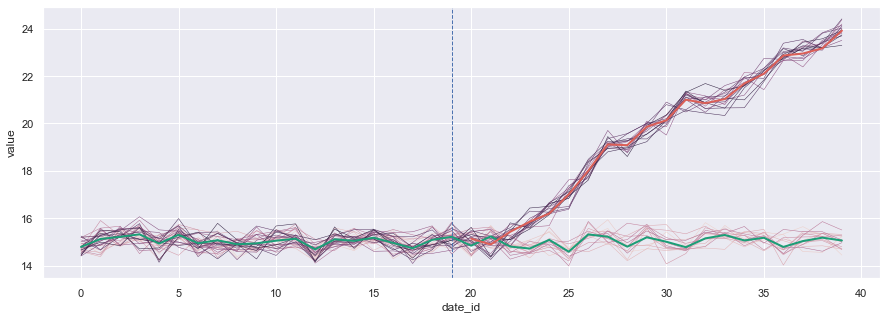

In [28]:
plt.figure(figsize=(15,5))


sns.lineplot(data=sim_df,
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.5)

sns.lineplot(data=clusts_df1,
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 2)


sns.lineplot(data=clusts_df2,
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "hls",
                     legend=False,
                     linewidth = 2)

plt.axvline(19, 0,20,
            linewidth=1,
            ls="--")



We see how our main algorithm: Greedy2 (Greedy2_1 in the code), performs on these simulated datasets.

In [12]:
### try greedy algo
traj_panel = Panel(trajObj_list = trajs,start_time=1)

C1,C2,C3,C4, C5 = 10,1,1,1,10
K_LIST = [1,2]
SEG_LIST = [1,2,3,4]

res_stc = greedy2_1(PANEL = traj_panel,
                     k_list= K_LIST,
                     seg_list = SEG_LIST, 
                     c1=C1,
                     c2=C2,
                     c3=C3,
                     c4=C4,
                     c5=C5)

print("loss G3",str(res_stc))

loss G3 SuperPathlets: 2, Total cost: 316.705111457957


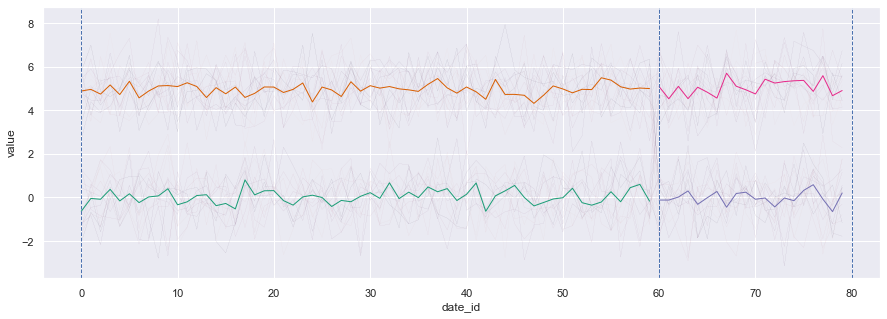

In [29]:
plot_dfs = plot_stc(res_stc)

plt.figure(figsize=(15,5))


sns.lineplot(data=plot_dfs["traj_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.05)

# plot pathlets
sns.lineplot(data=plot_dfs["pth_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 1)

# plot breaks

if len(plot_dfs["breaks"]) >0:
    for i in plot_dfs["breaks"]:
        plt.axvline(i, 0,20,
                   linewidth=1,
                   ls="--")

## Simulated experiments

Greedy performs as intended on the artificial datasets. We simulate additional dataset that motivate Greedy2. 

### Test 1

We focus on where units switch clusters over time. To do this, we generate a dataset where there is initially 2 clusters, and then the clusters switch after 60 periods, into two new clusters.

In [30]:
# generate data
random.seed(1)

p1 = [5]*20
p2 = [0]*20
T = 80
N = 30


t1 = p1*3 + p1
t2 = p1*3 + p2
t3 = p2*3 + p1
t4 = p2*3 + p2

trajs = []
for i in range(N):
    x = i % 4
    e = list(np.random.normal(0, 1, T))
    if x == 0:
        s =np.array(t1) + e
    elif x==1:
        s = np.array(t2) + e
    elif x==2:
        s= np.array(t3) + e
    else:
        s= np.array(t4) + e

    trajs.append(list(s))

    
sim_df = traj_list_to_df(trajs)


We plot the dataset below where each trajectory is represented by a different colour.

<AxesSubplot:xlabel='date_id', ylabel='value'>

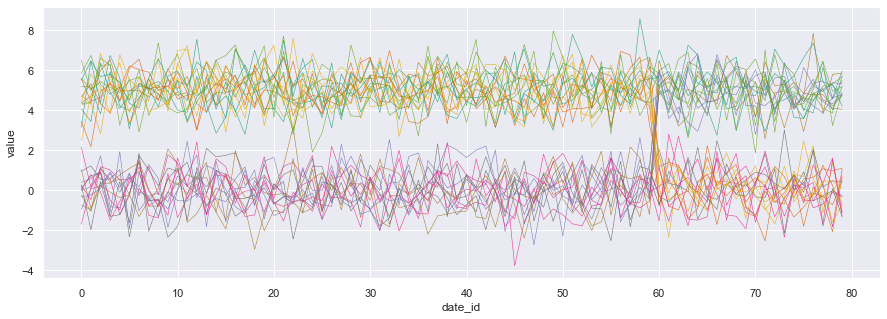

In [31]:
plt.figure(figsize=(15,5))


sns.lineplot(data=sim_df,
                     x="date_id",
                     y="value",
                     hue="id",
                     palette="Dark2",
                     legend=False,
                     linewidth = 0.5)





We then test out our naive and greedy algorithms on the dataset.

loss G1 SuperPathlets: 2, Total cost: 2846.290566608433


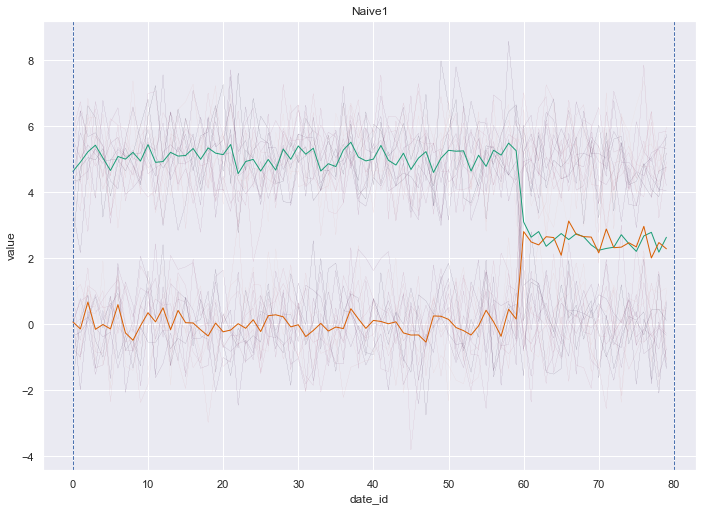

In [32]:
### naive1
traj_panel = Panel(trajObj_list = trajs,start_time=1)

C1,C2,C3,C4, C5 = 10,1,1,1,1
K_LIST = [2]
SEG_LIST = [1,2,3,4]

random.seed(1)
res_stc = naive_1(PANEL = traj_panel,
                     k_list= K_LIST,
                     c1=C1,
                     c2=C2,
                     c3=C3,
                     c4=C4,
                     c5=C5)

print("loss G1",str(res_stc))

plot_dfs = plot_stc(res_stc)

sns.lineplot(data=plot_dfs["traj_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.1).set_title('Naive1')

# plot pathlets
sns.lineplot(data=plot_dfs["pth_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 1)

# plot breaks

if len(plot_dfs["breaks"]) >0:
    for i in plot_dfs["breaks"]:
        plt.axvline(i, 0,20,
                   linewidth=1,
                   ls="--")

loss G1 SuperPathlets: 8, Total cost: 1974.2053283541795


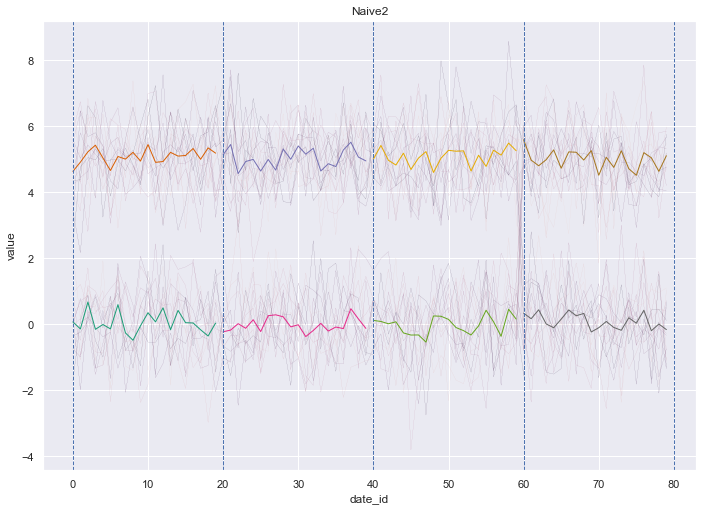

In [33]:
### naive3
traj_panel = Panel(trajObj_list = trajs,start_time=1)

C1,C2,C3,C4, C5 = 10,1,1,1,1
K_LIST = [2]
SEG_LIST = [4]

random.seed(1)
res_stc = naive_2(PANEL = traj_panel,
                     k_list= K_LIST,
                     seg_list = SEG_LIST, 
                     c1=C1,
                     c2=C2,
                     c3=C3,
                     c4=C4,
                     c5=C5)

print("loss G1",str(res_stc))

plot_dfs = plot_stc(res_stc)

sns.lineplot(data=plot_dfs["traj_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.1).set_title('Naive2')

# plot pathlets
sns.lineplot(data=plot_dfs["pth_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 1)

# plot breaks

if len(plot_dfs["breaks"]) >0:
    for i in plot_dfs["breaks"]:
        plt.axvline(i, 0,20,
                   linewidth=1,
                   ls="--")

loss G1 SuperPathlets: 2, Total cost: 1839.2053283541795


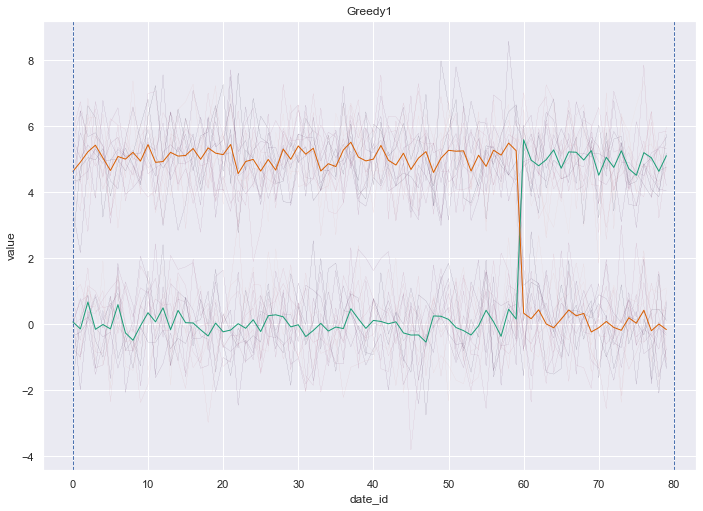

In [34]:
### greedy1
traj_panel = Panel(trajObj_list = trajs,start_time=1)

C1,C2,C3,C4, C5 = 10,1,1,1,1
K_LIST = [2]
SEG_LIST = [4]

random.seed(2)
res_stc = greedy1(PANEL = traj_panel,
                     k_list= K_LIST,
                     seg_list = SEG_LIST, 
                     c1=C1,
                     c2=C2,
                     c3=C3,
                     c4=C4,
                     c5=C5)

print("loss G1",str(res_stc))

plot_dfs = plot_stc(res_stc)

sns.lineplot(data=plot_dfs["traj_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.1).set_title('Greedy1')

# plot pathlets
sns.lineplot(data=plot_dfs["pth_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 1)

# plot breaks

if len(plot_dfs["breaks"]) >0:
    for i in plot_dfs["breaks"]:
        plt.axvline(i, 0,20,
                   linewidth=1,
                   ls="--")
        



loss G3 SuperPathlets: 4, Total cost: 1859.1688458885403


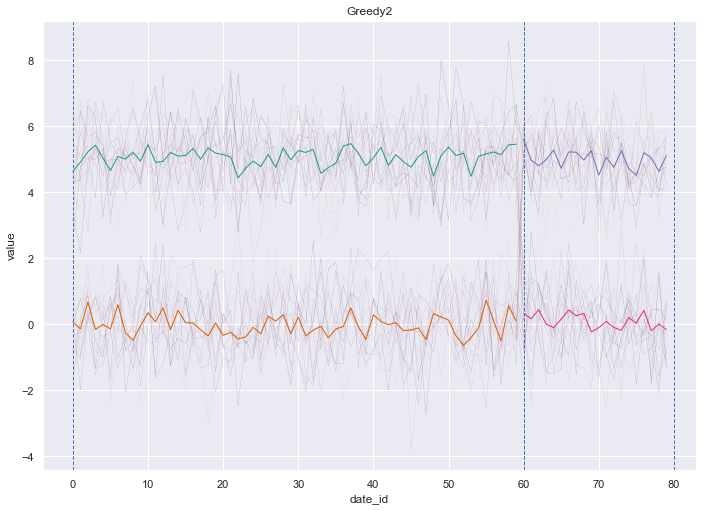

In [35]:
### greedy2
traj_panel = Panel(trajObj_list = trajs,start_time=1)

C1,C2,C3,C4, C5 = 10,1,1,1,1
K_LIST = [2]
SEG_LIST = [1,2,3,4]

random.seed(1)
res_stc = greedy2_1(PANEL = traj_panel,
                     k_list= K_LIST,
                     seg_list = SEG_LIST, 
                     c1=C1,
                     c2=C2,
                     c3=C3,
                     c4=C4,
                     c5=C5)

print("loss G3",str(res_stc))

plot_dfs = plot_stc(res_stc)

sns.lineplot(data=plot_dfs["traj_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     legend=False,
                     linewidth = 0.1).set_title('Greedy2')

# plot pathlets
sns.lineplot(data=plot_dfs["pth_df"],
                     x="date_id",
                     y="value",
                     hue="id",
                     palette = "Dark2",
                     legend=False,
                     linewidth = 1)

# plot breaks

if len(plot_dfs["breaks"]) >0:
    for i in plot_dfs["breaks"]:
        plt.axvline(i, 0,20,
                   linewidth=1,
                   ls="--")

greedy1 and greedy2 both parisomiously describe the data in this example.